# ソルバーを使わずに連立常微分方程式を解く
ここでは多次元の常微分方程式を扱う．  
題材は有名なローレンツ方程式．  
<br>
<br>
<img src=https://latex.codecogs.com/svg.image?\begin{pmatrix}\dot{x}\\\dot{y}\\\dot{z}\end{pmatrix}&space;=&space;\begin{pmatrix}-px&plus;py\\-xz&plus;rx-y\\xy-bz\end{pmatrix}>  
<br>

In [29]:
import matplotlib.pyplot as plt
import numpy as np

標準のリストで多次元配列の和を計算するのはかなり面倒です．  
多次元の場合，ベクトル和を一気に計算できるのでndarrayを使うのが楽．  


## 微分方程式の定義

In [30]:
def loorenz(X, p, r, b):
    """ndarray"""
    x = X[0, 0]
    y = X[1, 0]
    z = X[2, 0]
    
    dx = -p*x + p*y
    dy = -x*z + r*x -y
    dz = x*y - b*z
    
    return np.array([[dx, dy, dz]]).T

ルンゲクッタ法で解いてみる．  

In [31]:
x = []  # 解xを格納する空のリスト
t = []  # 時刻tnを格納するリスト

dt = 0.01

# パラメータ
p = 10
r = 28
b = 8/3

# 初期値代入
x.append(np.array([[0, 4, 28]]).T)
t.append(0)


for i in range(5000):
    # 係数を計算
    k1 = loorenz(x[i], p, r, b)
    k2 = loorenz(x[i] + dt/2*k1, p, r, b)
    k3 = loorenz(x[i] + dt/2*k2, p, r, b)
    k4 = loorenz(x[i] + dt*k3, p, r, b)
    
    x_next = x[i] + dt/6*(k1 + 2*k2 + 2*k3 + k4)  # 解を更新
    
    # 解を格納
    x.append(x_next)
    t.append(t[i] + dt)

解`x`はndarrayのリストになっているので特定の行を取り出すのが大変．  

In [32]:
x[:5]

[array([[ 0],
        [ 4],
        [28]]),
 array([[ 0.37874472],
        [ 3.96113633],
        [27.27079661]]),
 array([[ 0.71798164],
        [ 3.92785062],
        [26.57466741]]),
 array([[ 1.02220782],
        [ 3.9042356 ],
        [25.90911523]]),
 array([[ 1.29583319],
        [ 3.89341441],
        [25.27202581]])]

`np.concatenate()`で単一のndarrayに変換する．  

In [33]:
x = np.concatenate(x, axis=1)

In [34]:
x

array([[ 0.        ,  0.37874472,  0.71798164, ...,  9.12585895,
         8.21723138,  7.33724976],
       [ 4.        ,  3.96113633,  3.92785062, ..., -0.05854653,
        -0.74699631, -1.27972093],
       [28.        , 27.27079661, 26.57466741, ..., 36.47531608,
        35.48024863, 34.46825676]])

解をプロットしてみる．  

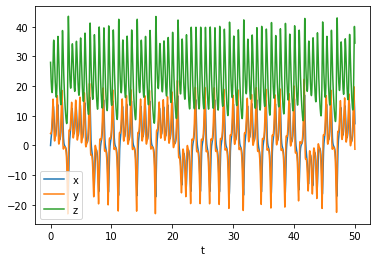

In [35]:
plt.plot(t, x[0, :], label="x")
plt.plot(t, x[1, :], label="y")
plt.plot(t, x[2, :], label="z")
plt.xlabel("t")
plt.legend()

3次元プロット

Text(0.5, 0, 'z')

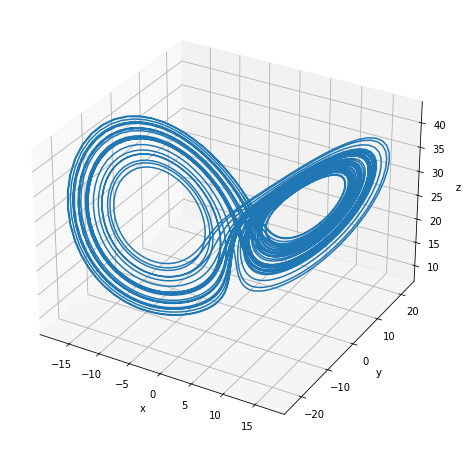

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.plot(x[0, :], x[1, :], x[2, :])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")